Preprocess Data

In [4]:
import pandas as pd
import os
import numpy as np

TRAIN_DIR = 'C:/Kaggle_data/DigitalRec/train.csv'
TEST_DIR = 'C:/Kaggle_data/DigitalRec/test.csv'
MODEL_NAME = 'Digit Recognizer v1'
OPTIMIZER = 'adam'
LR = 1e-3



trainData = pd.read_csv(TRAIN_DIR)
print(trainData.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [5]:
y = trainData['label']
X = trainData.drop(['label'], axis = 1)
print(X.head())
print(y.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0   

In [6]:
print(X.shape)

(42000, 784)


In [7]:
X = X.values.reshape(-1,28,28,1)
print(X.shape)


(42000, 28, 28, 1)


In [8]:
def label_y(y):
    ret = []    
    for v in y:
        new_value = [0]*10
        new_value[v]=1
        ret.append(new_value)
    return np.array(ret)
y = label_y(y)
print(y[:10])

[[0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]]


 Create and save model

In [9]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression


convnet = input_data(shape=[None, 28, 28, 1])

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)


convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.5)

convnet = fully_connected(convnet, 10, activation='softmax')
convnet = regression(convnet, optimizer=OPTIMIZER, learning_rate=LR, loss='categorical_crossentropy')

model = tflearn.DNN(convnet, tensorboard_dir='log')

if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')
else:                     
    model.fit(X, y, n_epoch=10, validation_set=0.1, shuffle=True,
        snapshot_step=200, show_metric=True, run_id=MODEL_NAME)

    model.save(MODEL_NAME)

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
INFO:tensorflow:Restoring parameters from C:\Users\Pega\Git\DigtalRec\Digit Recognizer v1
model loaded!


Visulization

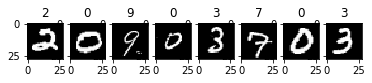

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
num = 0
test_data = pd.read_csv(TEST_DIR)
test_data = test_data.values.reshape(-1,28,28,1)
for data in test_data[:8]:   
    y = fig.add_subplot(1,8,num+1)
    num = num+1
    model_out = model.predict([data])
    prediction = np.argmax(model_out)
    data = data.reshape(28,28)
    y.imshow(data, cmap='gray')
    plt.title(prediction)
plt.show()   

Submit

In [31]:
model_out = model.predict(test_data)
submit = []
for i in range(0,len(model_out)):
    label = np.argmax(model_out[i])
    submit.append([i+1, label])

with open('submission-file.csv','w') as f:
    f.write('ImageId,Label\n')
with open('submission-file.csv','a') as f:
    for data in submit:
        f.write('{},{}\n'.format(data[0],data[1]))